## hipotesis 1

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSVs
df_licencias = pd.read_csv('./data/licencias_totales.csv')
df_suelo = pd.read_csv('./data/suelo_urbanizable_final.csv')

# Pasar a formato largo (un registro por Territorio y Año)
df_lic_long = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_suelo_long = df_suelo.melt(id_vars='Territorio', var_name='Año', value_name='Suelo_urbanizable')

# Convertir año a numérico
df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_suelo_long['Año'] = df_suelo_long['Año'].astype(int)


In [26]:
df_merged = pd.merge(df_lic_long, df_suelo_long, on=['Territorio', 'Año'])

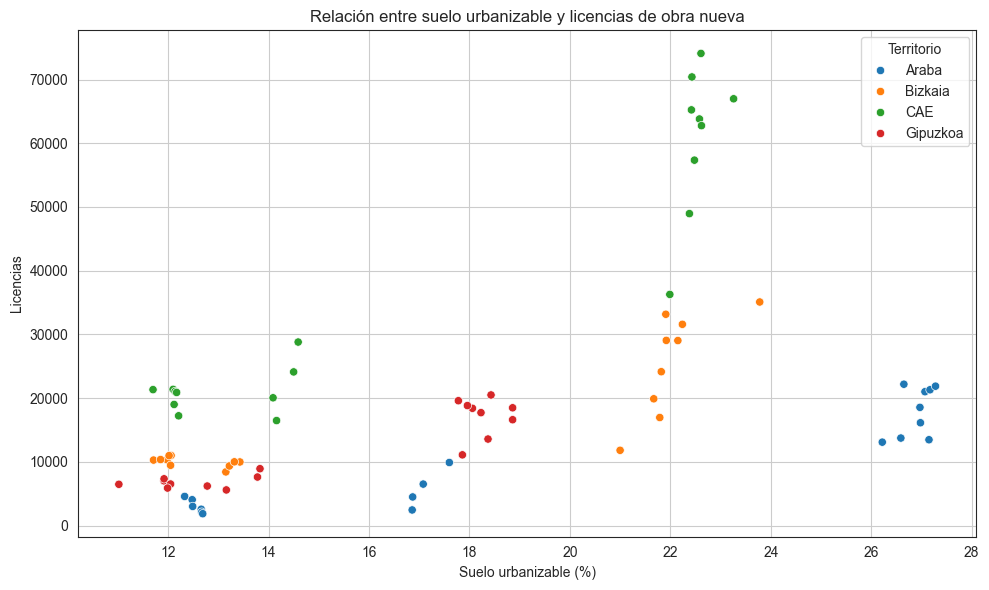

In [45]:
# Grafico Scatter
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.scatterplot(data=df_merged, x='Suelo_urbanizable', y='Licencias', hue='Territorio')
plt.title('Relación entre suelo urbanizable y licencias de obra nueva')
plt.xlabel('Suelo urbanizable (%)')
plt.ylabel('Licencias')
plt.grid(True)
plt.tight_layout()
plt.savefig('./img/hipotesis_1/licencias_por_territorio.png', dpi=300)
plt.show()



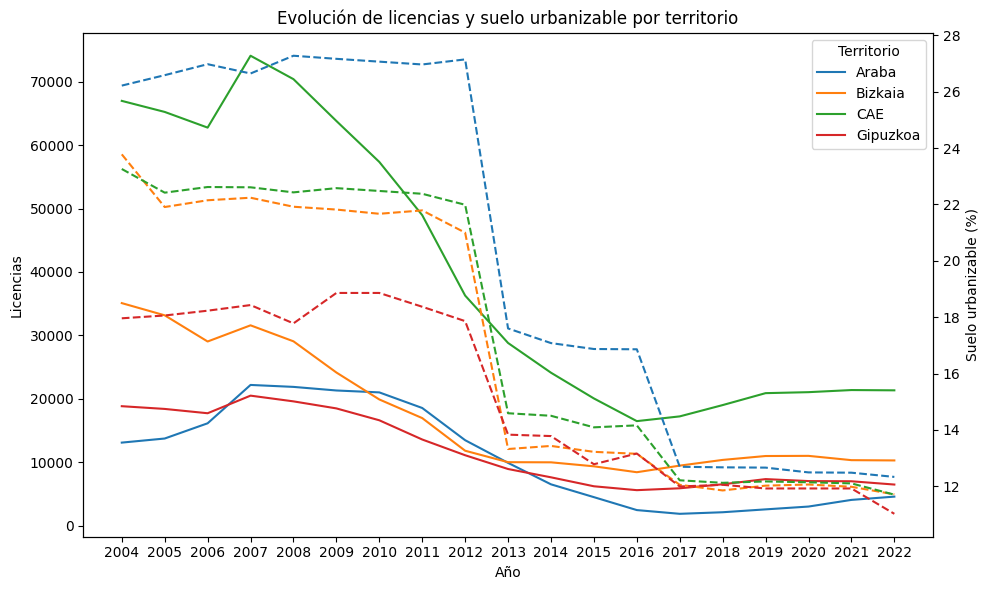

In [31]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_merged, x='Año', y='Licencias', hue='Territorio', ax=ax1)
ax1.set_ylabel('Licencias')
ax1.set_xlabel('Año')

#Sirve para que en eje X se vea como años enteros sin decimales
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x='Año', y='Suelo_urbanizable', hue='Territorio', ax=ax2, linestyle='--', legend=False)
ax2.set_ylabel('Suelo urbanizable (%)')

plt.title('Evolución de licencias y suelo urbanizable por territorio')
plt.tight_layout()
plt.show()


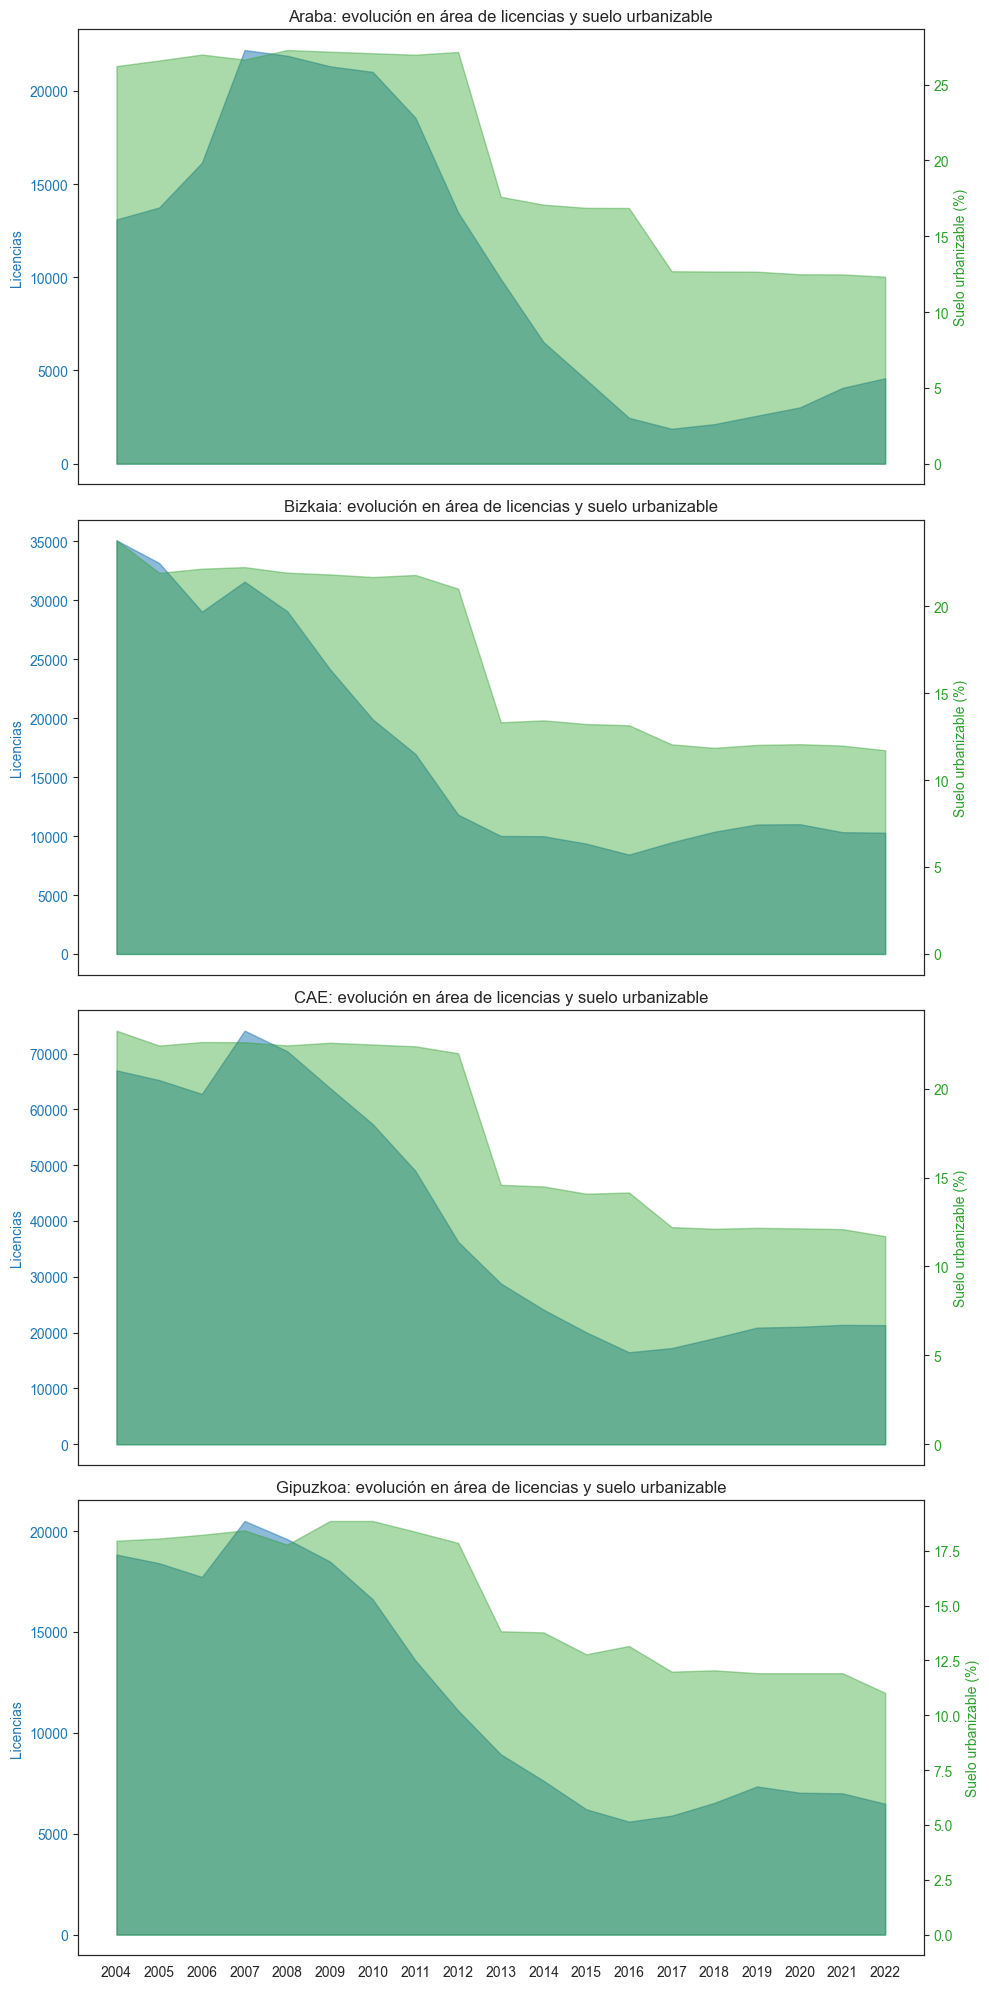

In [70]:
fig, axes = plt.subplots(len(territorios), 1, figsize=(10, 5 * len(territorios)), sharex=True)

for i, territorio in enumerate(territorios):
    data_territorio = df_merged[df_merged['Territorio'] == territorio]
    ax1 = axes[i]

    # Área para Licencias (eje izquierdo)
    ax1.fill_between(data_territorio['Año'], data_territorio['Licencias'], color='tab:blue', alpha=0.5, label='Licencias')
    ax1.set_ylabel('Licencias', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

    # Área para Suelo urbanizable (eje derecho)
    ax2 = ax1.twinx()
    ax2.fill_between(data_territorio['Año'], data_territorio['Suelo_urbanizable'], color='tab:green', alpha=0.4, label='Suelo urbanizable')
    ax2.set_ylabel('Suelo urbanizable (%)', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.set_title(f'{territorio}: evolución en área de licencias y suelo urbanizable')

plt.xlabel('Año')
plt.tight_layout()
plt.savefig('./img/hipotesis_1/licencias_por_territorios.png', dpi=300)

plt.show()


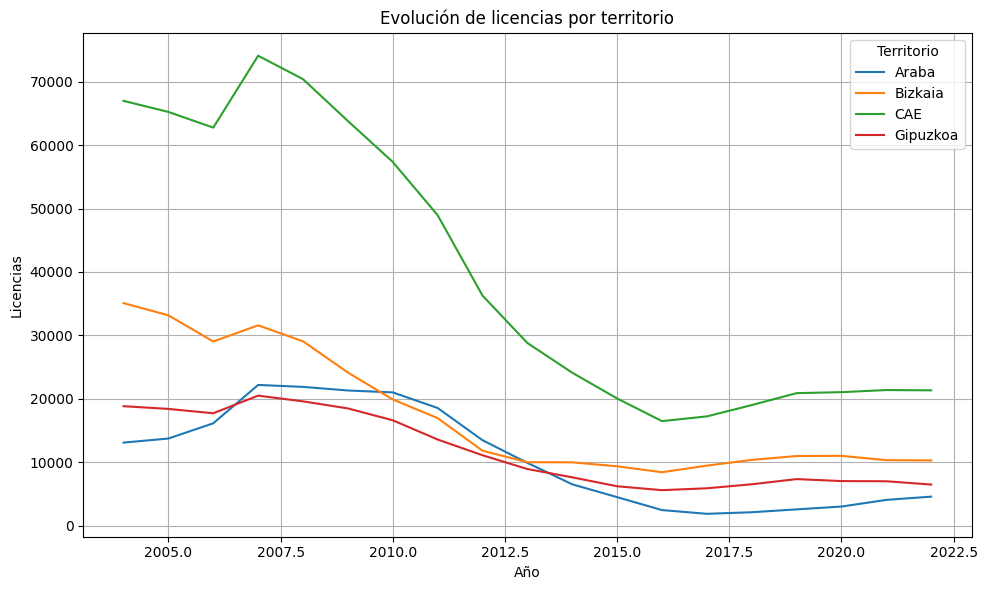

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merged, x='Año', y='Licencias', hue='Territorio')
plt.title('Evolución de licencias por territorio')
plt.grid(True)
plt.tight_layout()
plt.show()


# Hipotesis 1

In [63]:
import pandas as pd

# Cargar los datos
df_precio = pd.read_csv('./data/precio_cv_final.csv')
df_licencias = pd.read_csv('./data/licencias_final.csv')

# Transformar a formato largo
df_precio_melt = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio')
df_licencias_melt = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')

# Unir ambos dataframes
df = pd.merge(df_precio_melt, df_licencias_melt, on=['Territorio', 'Año'])

# Asegurar que el año es numérico
df['Año'] = df['Año'].astype(int)



<Figure size 1000x600 with 0 Axes>

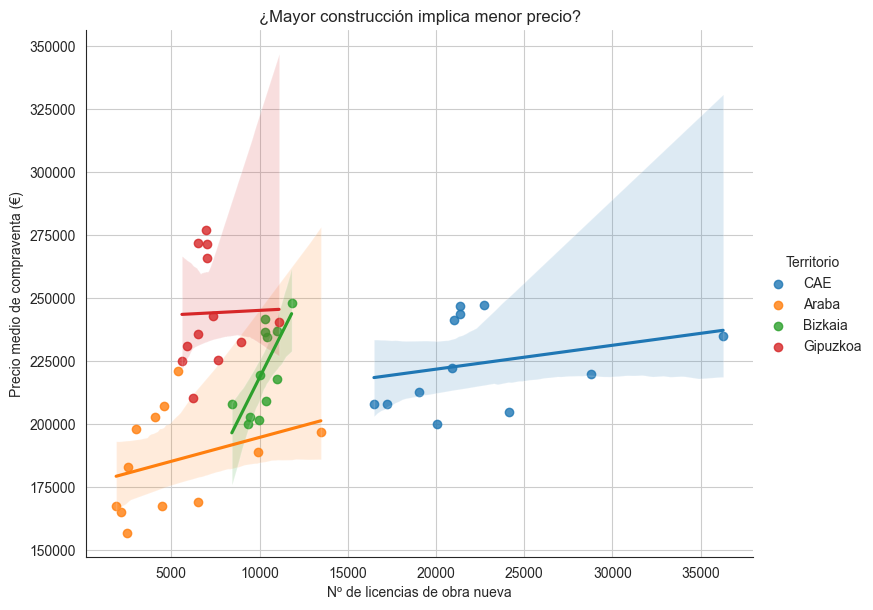

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Licencias', y='Precio', hue='Territorio', height=6, aspect=1.3)
plt.title('¿Mayor construcción implica menor precio?')
plt.xlabel('Nº de licencias de obra nueva')
plt.ylabel('Precio medio de compraventa (€)')
plt.grid(True)
plt.savefig('./img/hipotesis_1/licencias_precio_cv.png', dpi=300)

plt.show()


Año - Precios

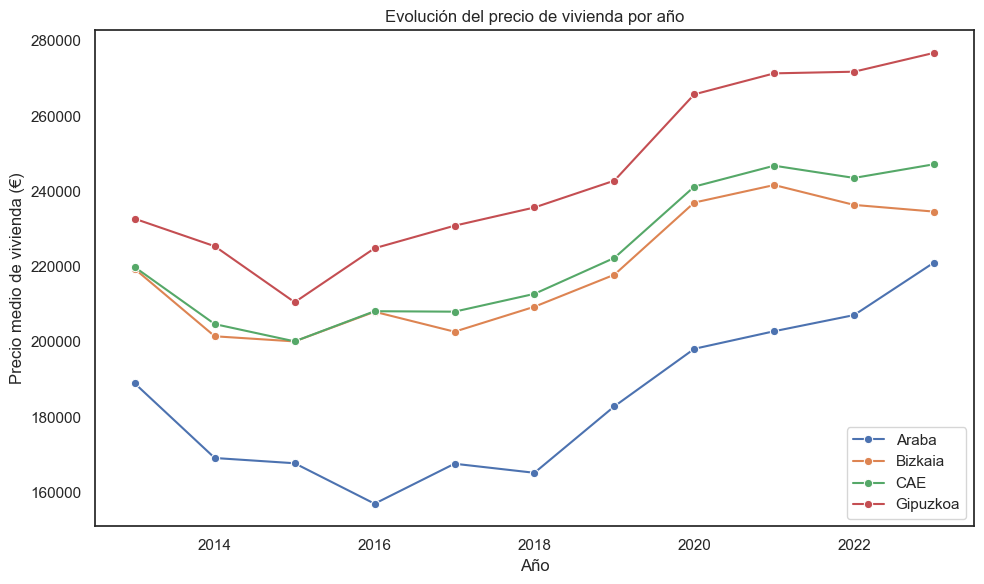

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x="Año", y="Precio", hue="Territorio", marker="o")
plt.title("Evolución del precio de vivienda por año")
plt.xlabel("Año")
plt.ylabel("Precio medio de vivienda (€)")
plt.legend(loc='lower right')

plt.savefig("./img/hipotesis_1_precio_por_año.png", dpi=300)
plt.tight_layout()
plt.show()
